# Flight Fare Prediction With Deployment

In [1]:
#data analysis libraries 
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting pandas to display a N number of columns and rows 
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column',111)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

- **Airline** :
- **Date_of_Journey** :
- **Source** :
- **Destination	Route** :
- **Dep_Time**	:when a plane leaves the gate. 
- **Arrival_Time**:when the plane pulls up to the gate.
- **Duration**	:Time taken by plane to reach destination, It is the differnce betwwen Departure Time and Arrival time
- **Total_Stops**	:
- **Additional_Info** :	
- **Price**  :The target variable

In [2]:
#Import data
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')

_Frame the problem_ : Regression Problem -> 'predict the flight prices in India'

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#X_test.head()

> From the table below, we can note a few things:
- First we notice that we have a lot of features with mixed data types, we have to convert them later 
- The target variable is only the numerical feature in the data set


In [5]:
train.shape

(10683, 11)

In [6]:
test.shape

(2671, 10)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- It seems that this data have only two missing values ,one in the 'Route' variable and the other in Total_Stop variable.
- The Date_of_Journey type is object not datatime !!


In [9]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
train.describe(include=['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


- Jet Airways airline is the most frequent in India about (3849/10683 = 36% ) 
- We notice that the top Source is Delhi and the top Destination is Cochin
- Most Additional_info values is No info mostly about 78% .I think I couldn't get more Infos from it and it would be logical to drop it from the data later  


## Preprocessing

- In the preprocessing phase, I convert features with mixed data types into numeric features, so that machine learning algorithms can process them
- Handling Categorial features
- Dropping Missing Values
- Dropping irrelevant features

In [11]:
train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


### train Set

#### Date_of_Journey

- The day format in Date_of_journey is dd/mm/yyyy.Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction
- For this we require pandas to_datetime to convert object data type to datetime dtype.
- Then i will create two additional columns one for day and one for month :
     - **.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

In [12]:
train.Date_of_Journey.dtype

dtype('O')

In [13]:
train['Journey_day']  = pd.to_datetime(train.Date_of_Journey, format = '%d/%m/%Y').dt.day

In [14]:
train['Journey_month'] = pd.to_datetime(train.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [15]:
train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


 Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

In [16]:
train.drop(["Date_of_Journey"], axis = 1, inplace = True)

#### Arrival_Time :

- Similar to Date_of_Journey we can extract values from Arrival_Time

In [17]:
D1 = pd.to_datetime(train.Arrival_Time)[0]
print(D1)

2020-03-22 01:10:00


In [18]:
# Extracting Hours
train['Arrival_hour'] = pd.to_datetime(train.Arrival_Time).dt.hour

# Extracting Minutes
train['Arrival_min'] = pd.to_datetime(train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time 
train.drop(['Arrival_Time'], axis = 1, inplace = True)


In [19]:
train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15


#### Dep_Time :

Similar to Date_of_Journey we can extract values from Dep_Time



In [20]:
# Extracting Hours
train['Dep_hour'] = pd.to_datetime(train['Dep_Time']).dt.hour

# Extracting Minutes
train['Dep_min'] = pd.to_datetime(train['Dep_Time']).dt.minute

# Now we can drop Dep_Time as it is of no use
train.drop(['Dep_Time'], axis = 1, inplace = True)

In [21]:
train.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50


#### Duration :

In [22]:
for i in range(train.shape[0]):
    if len(train.Duration[i].split()) != 2:    
        if 'h' in train.Duration[i]:
            train.Duration[i] = train.Duration[i].strip() + " 0m"   
        else:
            train.Duration[i] = "0h " + train.Duration[i]           

#train[['Duration']]

<ipython-input-22-4a82645fd0d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Duration[i] = train.Duration[i].strip() + " 0m"
<ipython-input-22-4a82645fd0d4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Duration[i] = "0h " + train.Duration[i]


In [23]:
duration_hours = []
duration_mins = []

for i in range(train.shape[0]):
    
    duration = train.Duration[i].split(' ')
    
    # Extract hours from duration
    duration_hours.append(duration[0].strip('h'))
    # Extracts only minutes from duration
    duration_mins.append(duration[1].strip('m'))   

In [24]:
# Adding duration_hours and duration_mins list to train_data dataframe

train['Duration_hours'] = duration_hours
train['Duration_mins'] = duration_mins

#train.head()
train.isna().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Arrival_hour       0
Arrival_min        0
Dep_hour           0
Dep_min            0
Duration_hours     0
Duration_mins      0
dtype: int64

In [25]:
train.drop(['Duration'], axis = 1, inplace = True)
train.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0


### Handling Categorical Data :


One can find many ways to handle categorical data. Some of them categorical data are,
- **Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
- **Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

#### Airline :

In [26]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

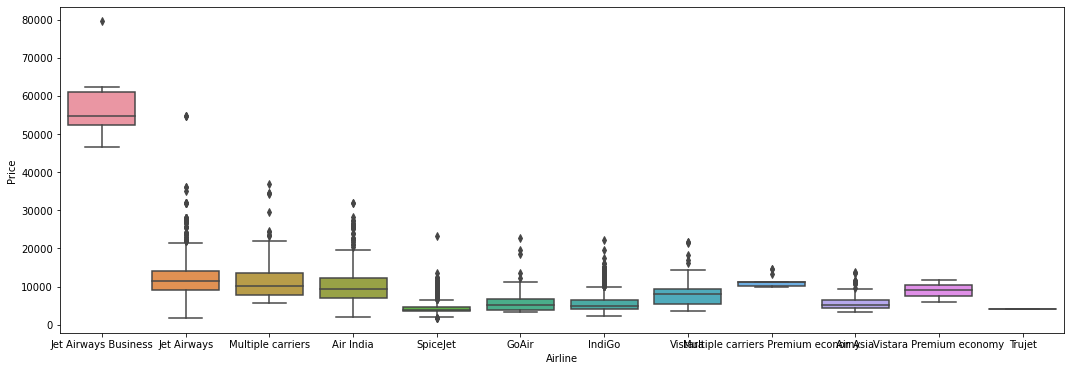

In [27]:
# Plot Airline Vs Price
plt.figure(figsize=(18,6))
sns.boxplot(x='Airline',y='Price', data=train.sort_values("Price", ascending = False))

 From the plot below :
- We see that Jet Airways Business have the highest prices
- Jet Airwayes, Multiple carriers and Air India have almost the same median and the maximum
- We have some outliers

In [28]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


#### Source :

In [29]:
train.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

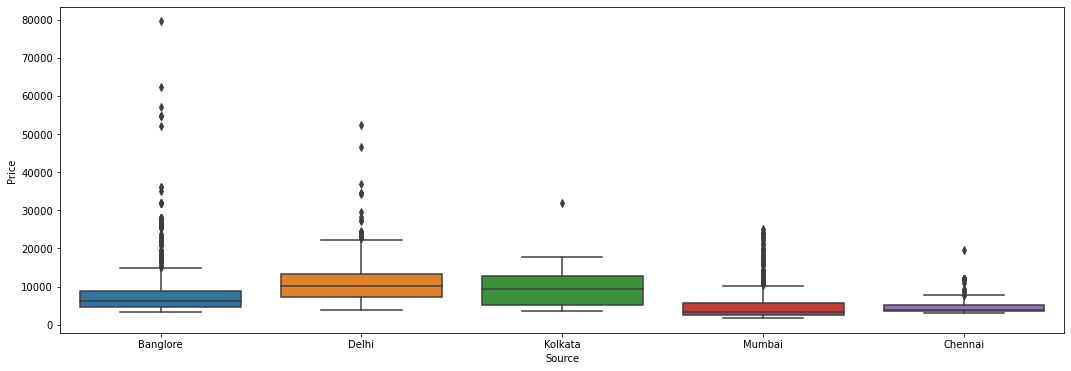

In [30]:
#plot Source vs Price
plt.figure(figsize=(18,6))
sns.boxplot(x='Source', y='Price', data=train.sort_values("Price", ascending = False))
plt.show()

- Banglore source have the highest price

In [31]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


#### Destination:

In [32]:
train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

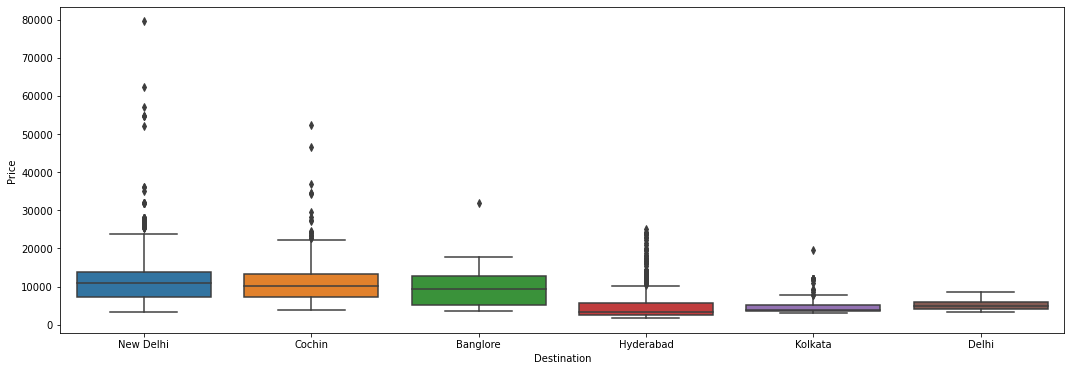

In [33]:
#plot Destination vs Price
plt.figure(figsize=(18,6))
sns.boxplot(x='Destination', y='Price', data=train.sort_values("Price", ascending = False))
plt.show()

- New Delhi Destination have the highest price

In [34]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


#### Total_Stops :

In [35]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
##Total_Stops has one missing value 
## Drop missing values

train.dropna(axis=0, inplace=True)
train.Total_Stops.isna().sum()

0

In [37]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
train.Total_Stops.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace = True)

In [38]:
train['Total_Stops'] = train.Total_Stops.astype(int)

In [39]:
train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,13,15,5,50,7,25


In [40]:
##Concatenate dataframe --> train + Airline + Source + Destination
train = pd.concat([train, Airline, Source, Destination], axis = 1)

In [41]:
train.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897.0,24.0,3.0,1.0,10.0,22.0,20.0,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662.0,1.0,5.0,13.0,15.0,5.0,50.0,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882.0,9.0,6.0,4.0,25.0,9.0,25.0,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [42]:
train.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

In [43]:
train.shape

(10683, 32)

### Drop irrelevant Features

- I will drop the Route and Additional_Info features since they are not a lot more useful information can be extracted from it. Besides, Route and Total_Stops are related to each other


In [44]:
train.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [45]:
train.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897.0,24.0,3.0,1.0,10.0,22.0,20.0,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,7662.0,1.0,5.0,13.0,15.0,5.0,50.0,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,13882.0,9.0,6.0,4.0,25.0,9.0,25.0,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,6218.0,12.0,5.0,23.0,30.0,18.0,5.0,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,13302.0,1.0,3.0,21.0,35.0,16.0,50.0,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
#Check if any NaN is left
train.dropna(axis=0, inplace=True)
train.isna().sum()

Total_Stops                                  0
Price                                        0
Journey_day                                  0
Journey_month                                0
Arrival_hour                                 0
Arrival_min                                  0
Dep_hour                                     0
Dep_min                                      0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

In [47]:
train.shape

(10682, 30)

## Test Set :

In [48]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [50]:
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

- The test data has no missing values

## Preprocessing :

- I will apply all the same preprocessing that i've used in the train set for the test set

In [51]:
# Date_of_Journey
test['Journey_day'] = pd.to_datetime(test.Date_of_Journey, format = "%d/%m/%Y").dt.day
test['Journey_month'] = pd.to_datetime(test.Date_of_Journey, format = "%d/%m/%Y").dt.month
test.drop(['Date_of_Journey'],axis = 1, inplace = True)

In [52]:
# Dep_Time
test['Dep_hour'] = pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_min'] = pd.to_datetime(test['Dep_Time']).dt.minute
test.drop(['Dep_Time'], axis = 1, inplace = True)

In [53]:
# Arrival_Time
test['Arrival_hour'] = pd.to_datetime(test.Arrival_Time).dt.hour
test['Arrival_min'] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(['Arrival_Time'], axis = 1, inplace = True)

In [54]:
# Duration
duration = list(test['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test['Duration_hours'] = duration_hours
test['Duration_mins'] = duration_mins
test.drop(['Duration'], axis = 1, inplace = True)


### Handling Categorical data

In [55]:
print('Airline')
print('_'*75)
print(test['Airline'].value_counts())
Airline = pd.get_dummies(test['Airline'], drop_first= True)

print()

print('Source')
print("-"*75)
print(test["Source"].value_counts())
Source = pd.get_dummies(test['Source'], drop_first= True)

print()

print('Destination')
print("-"*75)
print(test['Destination'].value_counts())
Destination = pd.get_dummies(test['Destination'], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

# Replacing Total_Stops
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
test = pd.concat([test, Airline, Source, Destination], axis = 1)

test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", test.shape)

Airline
___________________________________________________________________________
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


Shape of t

In [56]:
test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
test = test.astype(int)

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        2671 non-null   int64
 1   Journey_day                        2671 non-null   int64
 2   Journey_month                      2671 non-null   int64
 3   Dep_hour                           2671 non-null   int64
 4   Dep_min                            2671 non-null   int64
 5   Arrival_hour                       2671 non-null   int64
 6   Arrival_min                        2671 non-null   int64
 7   Duration_hours                     2671 non-null   int64
 8   Duration_mins                      2671 non-null   int64
 9   Air India                          2671 non-null   int64
 10  GoAir                              2671 non-null   int64
 11  IndiGo                             2671 non-null   int64
 12  Jet Airways         

In [59]:
test.isna().sum()

Total_Stops                          0
Journey_day                          0
Journey_month                        0
Dep_hour                             0
Dep_min                              0
Arrival_hour                         0
Arrival_min                          0
Duration_hours                       0
Duration_mins                        0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                

## Feature Selection


In [60]:
# Finds correlation between Independent and dependent attributes
train.corr().Price.abs().sort_values(ascending=False)

Price                                        1.000000
Total_Stops                                  0.603897
Airline_Jet Airways                          0.416124
Airline_IndiGo                               0.361070
Destination_Delhi                            0.313417
Airline_SpiceJet                             0.296565
Destination_Cochin                           0.270676
Source_Delhi                                 0.270676
Airline_Jet Airways Business                 0.253303
Destination_Hyderabad                        0.230755
Source_Mumbai                                0.230755
Destination_New Delhi                        0.189777
Destination_Kolkata                          0.179223
Source_Chennai                               0.179223
Journey_day                                  0.153774
Airline_Multiple carriers                    0.139793
Journey_month                                0.103643
Airline_GoAir                                0.095151
Arrival_min                 

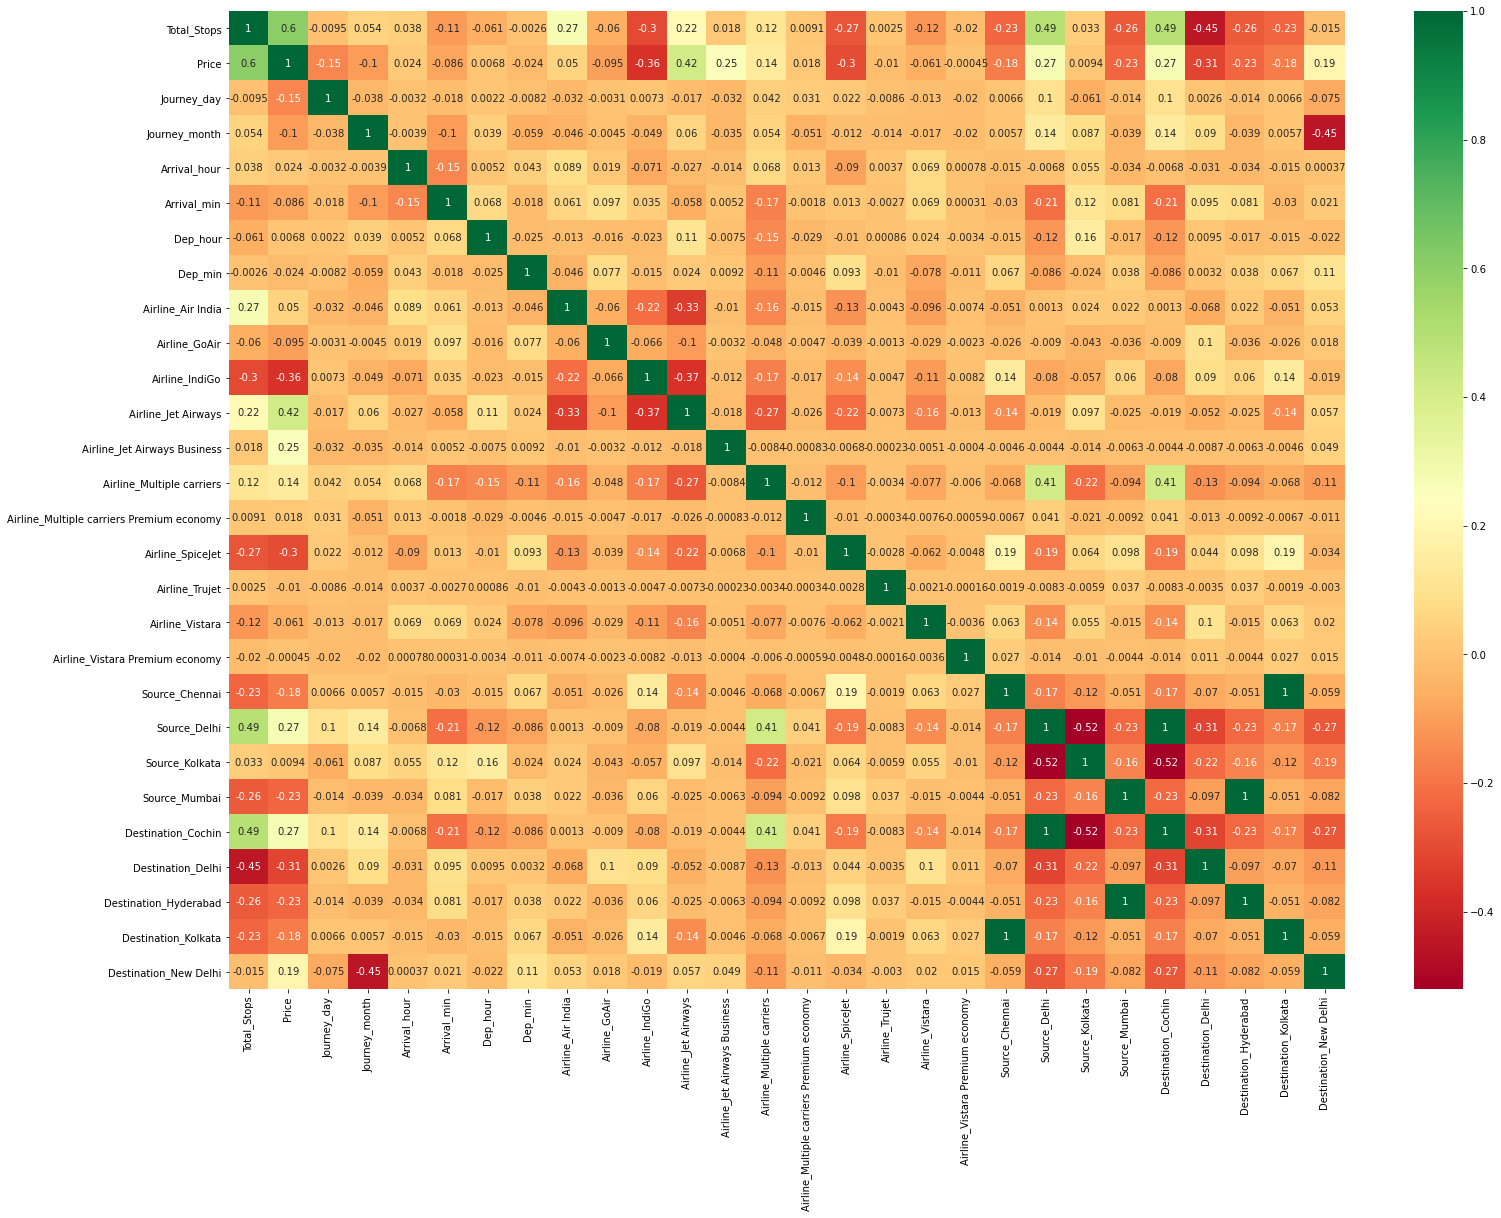

In [61]:
#Correlation Matrix
plt.figure(figsize = (25,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [62]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [63]:
X = train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X = X.astype(int)
y = train.iloc[:, 1]

In [64]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

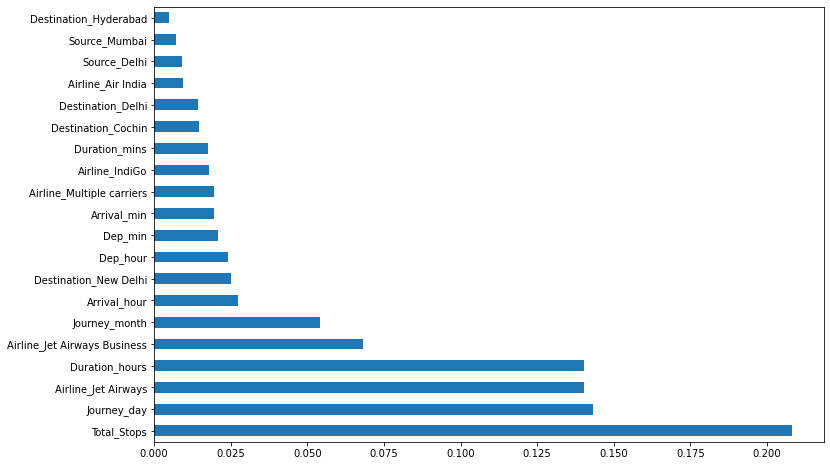

In [65]:
#plot a graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Modelling :

- Create an instance of the model class.
- Training Random Forest Regressor
- Evalutation unsing Mean Squared Error, Mean absolute error, Root Mean Squared Error and r2_score
- Hyperparameter Tunning using RandomizedSearchCV
- Evaluate the Final System on test data
- Saving the Model

In [66]:
#Split the data into X_train ,y_train, X_test and y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

### Random Forest Regressor :

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

RF_rgr = RandomForestRegressor(random_state=0, bootstrap=True, n_jobs=-1)

RF_rgr.fit(X_train, y_train)
y_pred = RF_rgr.predict(X_test)

print('Train score',RF_rgr.score(X_train, y_train))
print('Test score', RF_rgr.score(X_test, y_test))

Train score 0.9552662545038509
Test score 0.8117641758195417


In [70]:
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2_score:', r2_score(y_test, y_pred))

MAE: 1250.3276471878744
MSE: 4416610.078076093
RMSE: 2101.5732388085107
R2_score: 0.8117641758195417


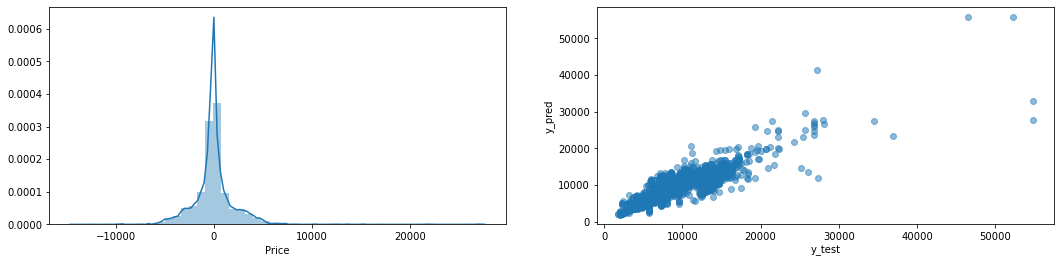

In [71]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred)

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Tunning Hyperparameters 

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 200, num = 5)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [80]:
random_grid  = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

- I use RandomizedSearchCV to find out the best combination of hyperparameters for the RandomForest model

In [81]:
#grid = GridSearchCV(estimator=mod, param_grid=param_grid, cv= 5, scoring='neg_mean_squared_error')

randomSCV = RandomizedSearchCV( RF_rgr, random_grid, cv=5, scoring='neg_mean_squared_error', random_state=0)

randomSCV.fit(X_train, y_train)
RFR_best_hyparams = randomSCV.best_estimator_
    
print('best score :', randomSCV.best_score_ )
print('best params :', randomSCV.best_params_ )

best score : -3741539.535483662
best params : {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 200}


In [82]:
prediction = RFR_best_hyparams.predict(X_test)

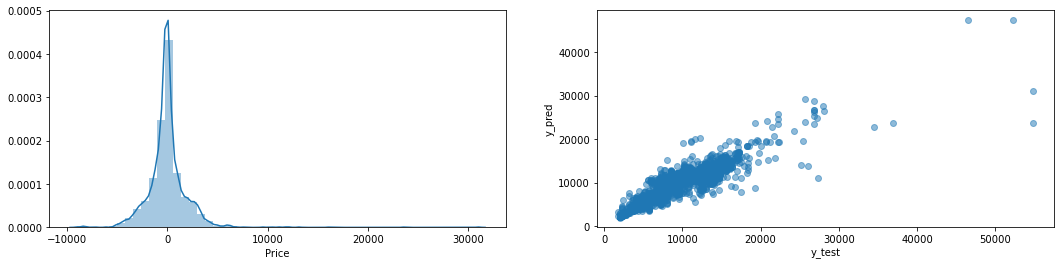

In [83]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
sns.distplot(y_test - prediction)

plt.subplot(1,2,2)
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [84]:
print('MAE:',mean_absolute_error(y_test, prediction))
print('MSE:',mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_test, prediction)))
print('R2_score:', r2_score(y_test, prediction))

MAE: 1198.5751405134454
MSE: 4059189.6292693587
RMSE: 2014.743067805262
R2_score: 0.8269974274697287


### Save the model to reuse it again


In [94]:
import pickle
# open a file, where you ant to store the data
file = open('flight_price_rf.pkl', 'wb')

# dump information to that file
pickle.dump(RFR_best_hyparams, file)

In [95]:
model = open('flight_price_rf.pkl','rb')
forest = pickle.load(model)

In [96]:
y_prediction = forest.predict(X_test)

In [97]:
r2_score(y_test, y_prediction)


0.8269974274697287